# Function fitting by Tensorflow
fitting sin(x)

In [5]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [6]:
# create data
def f(x):
    return np.sin(x)

def make_data(x, f, ep):
    return f(x) + np.random.normal(0, ep, x.shape[0])

(63, 1)

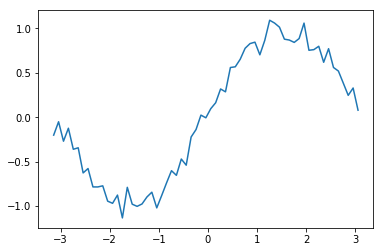

In [56]:
# datasets
t_x = np.arange(- 3. * np.pi / 3., 3. * np.pi / 3., 0.1)
t_y = make_data(t_x, f, 0.1)
plt.plot(t_x, t_y)
t_x = t_x[:, np.newaxis]
t_y = t_y[:, np.newaxis]
t_x.shape

In [57]:
# define model
x = tf.placeholder(tf.float32, [None, 1])
w1 = tf.Variable(tf.truncated_normal([1, 5]))
b1 = tf.Variable(tf.zeros([5]))
w2 = tf.Variable(tf.truncated_normal([5, 1]))
b2 = tf.Variable(tf.zeros([1]))
y0 = tf.nn.sigmoid(tf.matmul(x, w1)+b1)
y1 = tf.matmul(y0, w2) + b2

y = tf.placeholder(tf.float32, [None, 1])
loss = tf.reduce_sum(tf.square(y1 - y))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [70]:
# training
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# to see overfitting, 100000, underfitting, 1000
for i in range(0, 8000):
    sess.run(train_step, feed_dict={x: t_x, y: t_y})
    if i % 500 == 0:
        loss_v = sess.run(loss, feed_dict={x: t_x, y: t_y})
        print(loss_v)

84.55871
9.933558
5.434822
4.520827
3.8082325
3.2854893
2.92902
2.6702209
2.4357986
2.1966565
1.9545007
1.7111828
1.4725554
1.2455086
1.037068
0.85982406


In [71]:
# prediction
prediction = sess.run(y1, feed_dict={x: t_x})

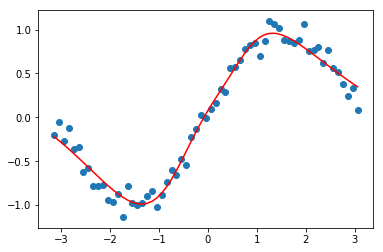

In [72]:
# visualize
plt.scatter(t_x, t_y)
plt.plot(t_x, prediction, color='red')